# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [1]:
# Code Here
#!pip install palmerpenguins

Need to dummify sex, species, and island

In [21]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [30]:
#data step

from palmerpenguins import *

penguins = load_penguins()

#drop na
penguins = penguins.dropna()

#take response variable out of x
X = penguins.drop('bill_length_mm', axis =1)

#y is only response variable
y = penguins['bill_length_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)


In [19]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [31]:
#model step

## preprocessing: One-hot-encode
## Model specification: Linear Regression

#make object for model specification
lr = LinearRegression()

#make one-hot-encoder object
enc = OneHotEncoder()

#one hot encode species column
ct = ColumnTransformer(
    [("dummify_s", enc, ['species']),
    ("dummify_i", enc, ['island']),
    ("dummify_sex", enc, ['sex'])]
)

#names ct object as dummify_everything
my_pipeline = Pipeline(
    [('dummify_everything',ct), ('ols', lr)]
)



In [33]:
#fit step
fitted_pipeline = my_pipeline.fit(X_train, y_train)
fitted_pipeline

Pipeline(steps=[('dummify_everything',
                 ColumnTransformer(transformers=[('dummify_s', OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_i', OneHotEncoder(),
                                                  ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('ols', LinearRegression())])

In [ ]:
y_pred = fitted_pipeline.predict(X_test)

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

Simple Linear Regression

In [70]:
#Data step
penguins = load_penguins()

#drop na
penguins = penguins.dropna()

#take response variable out of x
X = penguins[['bill_length_mm']]

#y is only response variable
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [71]:
#model step

## preprocessing: One-hot-encode
## Model specification: Linear Regression

#make object for model specification
lr = LinearRegression()



#names ct object as dummify_everything
my_pipeline_lr = Pipeline(
    [('ols',lr)]
)


In [72]:
#fit step
fitted_pipeline_lr = my_pipeline_lr.fit(X_train, y_train)
fitted_pipeline_lr

Pipeline(steps=[('ols', LinearRegression())])

In [73]:
y_pred_lr = fitted_pipeline_lr.predict(X_test)
y_pred_lr

array([16.54341094, 16.72126102, 17.69475619, 17.6666746 , 16.33747927,
       17.43266133, 16.85230845, 16.37492139, 17.86324574, 16.79614526,
       16.67445837, 16.88039004, 16.3468398 , 17.47010346, 17.39521921,
       17.22672966, 17.53562717, 16.55277147, 16.97399534, 16.23451344,
       17.28289285, 16.44044511, 16.71190049, 17.2080086 , 16.30003715,
       17.4513824 , 17.25481126, 16.37492139, 17.65731407, 17.48882452,
       17.58242982, 17.33905603, 16.49660829, 16.29067662, 16.8991111 ,
       17.00207693, 17.27353232, 16.32811874, 17.46074293, 17.55434823,
       16.16898972, 17.96621157, 16.4685267 , 17.53562717, 16.76806367,
       17.58242982, 16.37492139, 16.81486633, 16.87102951, 16.83358739,
       17.15184542, 16.6838189 , 17.16120595, 17.12376383, 17.68539566,
       16.45916617, 17.67603513, 16.88975057, 17.17056648, 17.57306929,
       17.30161391, 17.39521921, 16.26259503, 17.73219831, 16.64637678,
       16.75870314, 16.23451344, 17.57306929, 18.00365369, 16.79

Quadratic (degree 2 polynomial)

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
#model step

## preprocessing: One-hot-encode
## Model specification: Linear Regression

#make object for model specification
lr_2 = LinearRegression()

pf2 = PolynomialFeatures(degree=(1,2))

ct_2 = ColumnTransformer(
    [("pf_2", pf2, ['bill_length_mm'])]
)

#names ct object as dummify_everything
my_pipeline_2 = Pipeline(
    [('degree_2', ct_2), ('ols',lr_2)]
)


In [75]:
fitted_pipeline_2 = my_pipeline_2.fit(X_train, y_train)
fitted_pipeline_2

Pipeline(steps=[('degree_2',
                 ColumnTransformer(transformers=[('pf_2',
                                                  PolynomialFeatures(degree=(1,
                                                                             2)),
                                                  ['bill_length_mm'])])),
                ('ols', LinearRegression())])

In [76]:
y_pred_2 = fitted_pipeline_2.predict(X_test)
y_pred_2

array([16.37574945, 16.35195191, 18.18943483, 18.08982122, 16.54205561,
       17.36738601, 16.40548453, 16.50074265, 18.84526278, 16.37515833,
       16.3474466 , 16.42480094, 16.53126589, 17.47005426, 17.2696402 ,
       16.89069919, 17.66156829, 16.37172808, 16.50918634, 16.68104755,
       17.00593738, 16.44028957, 16.35043555, 16.85474767, 16.588291  ,
       17.41810483, 16.94693385, 16.50074265, 18.05723199, 17.52323429,
       17.80759359, 17.13225105, 16.40047109, 16.60061898, 16.4392168 ,
       16.54050118, 16.98596189, 16.55315298, 17.44392572, 17.71905545,
       16.78887906, 19.29511704, 16.4189959 , 17.66156829, 16.36414853,
       17.80759359, 16.50074265, 16.38403646, 16.41805448, 16.39414519,
       16.75427678, 16.34773236, 16.7702528 , 16.70819464, 18.15592264,
       16.42578614, 18.12271811, 16.43185504, 16.78653647, 17.77777323,
       17.04681133, 17.2696402 , 16.63944883, 18.32656012, 16.34843523,
       16.3610939 , 16.68104755, 17.77777323, 19.46792997, 16.37

Cubic

In [77]:
#model step

## preprocessing: One-hot-encode
## Model specification: Linear Regression

#make object for model specification
lr3 = LinearRegression()


pf3 = PolynomialFeatures(degree=(2,3))

ct3 = ColumnTransformer(
    [("pf_3", pf3, ['bill_length_mm'])]
)

#names ct object as dummify_everything
my_pipeline3 = Pipeline(
    [('degree_3', ct3), ('ols',lr3)]
)


In [78]:
fitted_pipeline3 = my_pipeline3.fit(X_train, y_train)
fitted_pipeline3

Pipeline(steps=[('degree_3',
                 ColumnTransformer(transformers=[('pf_3',
                                                  PolynomialFeatures(degree=(2,
                                                                             3)),
                                                  ['bill_length_mm'])])),
                ('ols', LinearRegression())])

In [79]:
y_pred3 = fitted_pipeline3.predict(X_test)
y_pred3

array([16.31906433, 16.30786453, 18.20451331, 18.11262225, 16.50317702,
       17.41930082, 16.38084389, 16.45536692, 18.79057748, 16.34145517,
       16.29816756, 16.40498505, 16.49061127, 17.52102981, 17.32131226,
       16.92925597, 17.7077638 , 16.31516429, 16.50624136, 16.66888334,
       17.0507605 , 16.38724405, 16.30522081, 16.8908756 , 16.55756873,
       17.46970383, 16.98882647, 16.45536692, 18.08238154, 17.57326661,
       17.84768803, 17.18155521, 16.34426429, 16.57220641, 16.4226983 ,
       16.54269614, 17.02985574, 16.51615413, 17.49525221, 17.76309287,
       16.80117215, 19.17544457, 16.36399871, 17.7077638 , 16.32628958,
       17.84768803, 16.45536692, 16.353253  , 16.39661265, 16.36638662,
       16.78226793, 16.2993996 , 16.79967979, 16.73171426, 18.17368965,
       16.37135503, 18.14305879, 16.41368077, 16.81736944, 17.81927813,
       17.09334268, 17.32131226, 16.61863916, 18.32970557, 16.29661778,
       16.32191543, 16.66888334, 17.81927813, 19.31992049, 16.34

Degree 10

In [80]:
#model step

## preprocessing: One-hot-encode
## Model specification: Linear Regression

#make object for model specification
lr10 = LinearRegression()


pf10 = PolynomialFeatures(degree=(1,10))

ct10 = ColumnTransformer(
    [("pf_10", pf10, ['bill_length_mm'])]
)

#names ct object as dummify_everything
my_pipeline10 = Pipeline(
    [('degree_10', ct10), ('ols',lr10)]
)

In [81]:
fitted_pipeline10 = my_pipeline10.fit(X_train, y_train)
fitted_pipeline10

Pipeline(steps=[('degree_10',
                 ColumnTransformer(transformers=[('pf_10',
                                                  PolynomialFeatures(degree=(1,
                                                                             10)),
                                                  ['bill_length_mm'])])),
                ('ols', LinearRegression())])

In [82]:
y_pred10 = fitted_pipeline10.predict(X_test)
y_pred10

array([15.79485731, 15.35032568, 18.08616591, 18.18742407, 17.19102656,
       18.39028543, 15.58221466, 16.90154487, 17.24868808, 15.42926138,
       15.38030351, 15.68515521, 17.11842164, 18.44009111, 18.3096799 ,
       17.61909193, 18.45082906, 15.7498659 , 16.13006553, 17.95193729,
       17.90085794, 16.41758399, 15.35131253, 17.5165685 , 17.47923905,
       18.41910792, 17.76526525, 16.90154487, 18.2179601 , 18.45314359,
       18.39897454, 18.13444251, 16.05102897, 17.55000338, 15.76250536,
       16.28672713, 17.85693165, 17.26355567, 18.43058605, 18.43596669,
       18.33810847, 16.65973586, 16.2272237 , 18.45082906, 15.38201225,
       18.39897454, 16.90154487, 15.47189942, 15.64903432, 15.52302078,
       17.19040305, 15.36927694, 17.24629963, 17.02032213, 18.12148344,
       16.2892253 , 18.15525104, 15.72300038, 17.30167609, 18.41324529,
       17.98462729, 18.3096799 , 17.75676569, 17.93036503, 15.42855232,
       15.37087997, 17.95193729, 18.41324529, 16.45824899, 15.42

Graph It

In [95]:
X_test['bill_depth_mm'] = y_test
X_test['y pred-linear'] = y_pred_lr
X_test['y pred-quad'] = y_pred_2
X_test['y pred-cubic'] = y_pred3
X_test['y-pred-10'] = y_pred10

X_test

,bill_length_mm,y,y pred-linear,y pred-quad,y pred-cubic,y-pred-10,bill_depth_mm
154,48.7,14.1,16.543411,16.375749,16.319064,15.794857,14.1
337,46.8,16.5,16.721261,16.351952,16.307865,15.350326,16.5
34,36.4,17.0,17.694756,18.189435,18.204513,18.086166,17.0
82,36.7,18.8,17.666675,18.089821,18.112622,18.187424,18.8
320,50.9,17.9,16.337479,16.542056,16.503177,17.191027,17.9
...,...,...,...,...,...,...,...
83,35.1,19.4,17.816443,18.653090,18.622075,17.510137,19.4
322,50.1,17.9,16.412364,16.464352,16.414041,16.619496,17.9
39,39.8,19.1,17.376498,17.222613,17.273751,18.258270,19.1
133,37.5,18.5,17.591790,17.837722,17.876307,18.382788,18.5


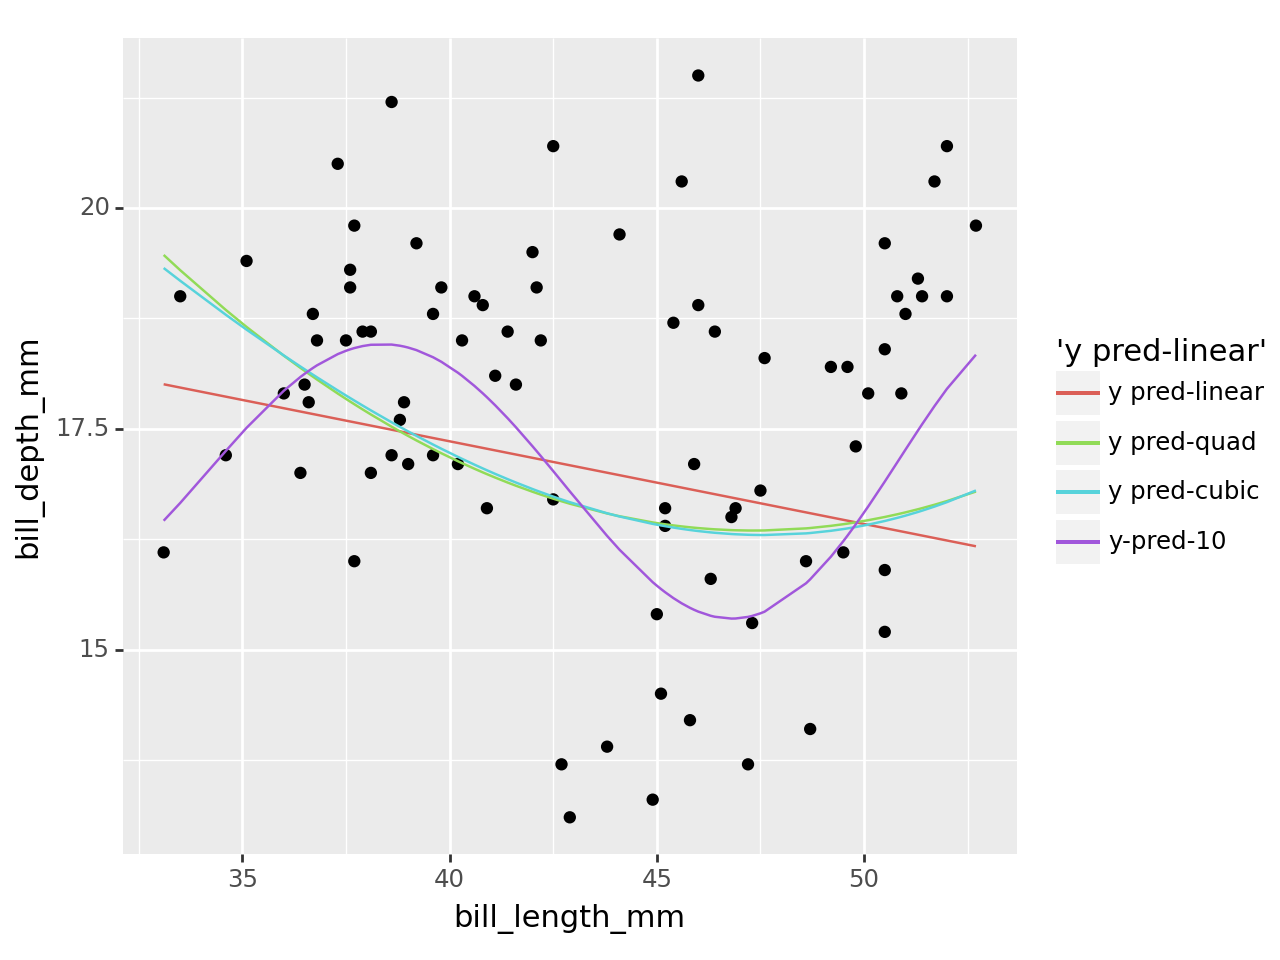

<Figure Size: (640 x 480)>

In [96]:
from plotnine import *

(ggplot(X_test, aes(x="bill_length_mm", y = "bill_depth_mm"))
+geom_point()
+geom_line(aes(y='y pred-linear', color="'y pred-linear'"))
+geom_line(aes(y='y pred-quad', color="'y pred-quad'"))
+geom_line(aes(y='y pred-cubic', color="'y pred-cubic'"))
+geom_line(aes(y='y-pred-10', color="'y-pred-10'"))
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of the models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

Linear seems to be underfitting because as bill_length_mm gets higher the actual points seem to be farther from the line.

The degree 10 seems to be overfitting the data because it is hard to believe that is the pattern that may be occuring with the ups/downs. It seems like it is capturing some of the randomness as well.

Quadratic and Cubic models are very similar so I would choose one of those because it seems to capture the general pattern of the data with slope of decrease changing but it does not overfit to the individual quirks of the data.